In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings as wr
wr.filterwarnings("ignore")

In [3]:
# load data
from sklearn.datasets import load_boston
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# Description
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Data Preprocessing
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Column Values
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
# Data convert to dataframe
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.columns

RangeIndex(start=0, stop=13, step=1)

In [9]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [11]:
df = pd.DataFrame(data.data, dtype=np.float32)
df.columns = data.feature_names
df['MEDV'] = data.target # Target added e.g MEDV
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float64
dtypes: float32(13), float64(1)
memory usage: 29.8 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


In [14]:
df.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

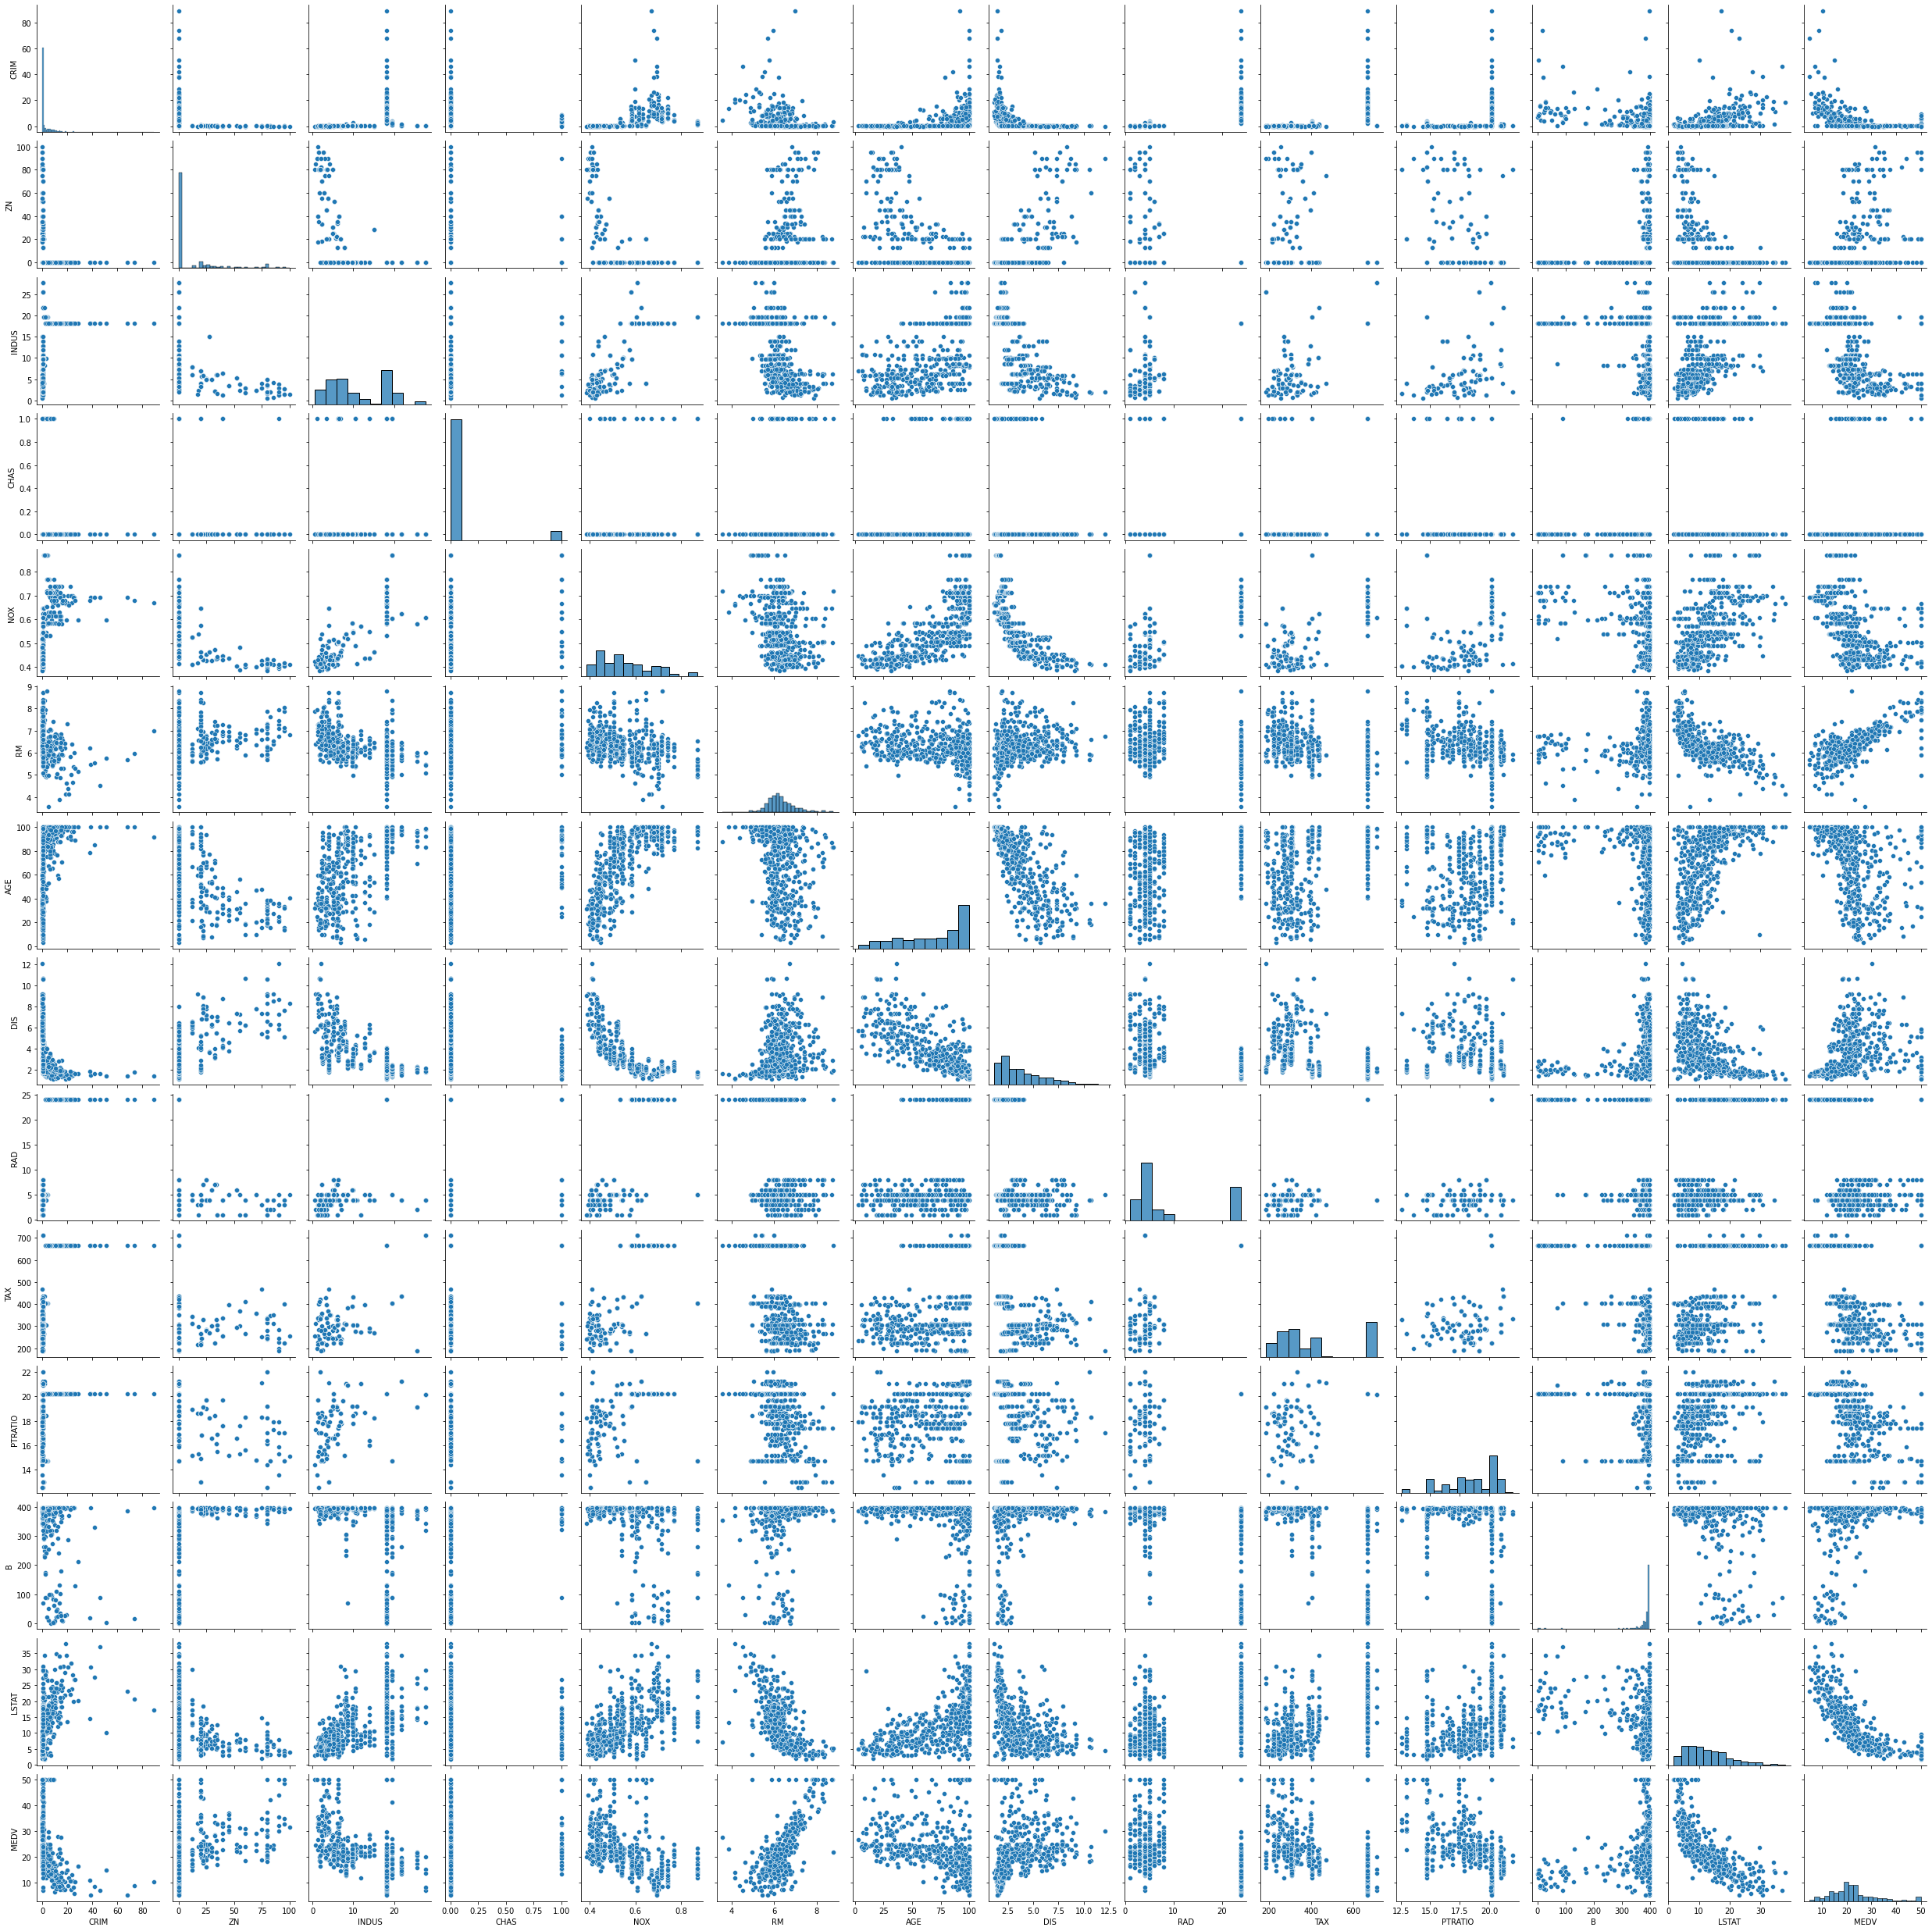

In [15]:
sns.pairplot(data=df)
plt.show()

In [16]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


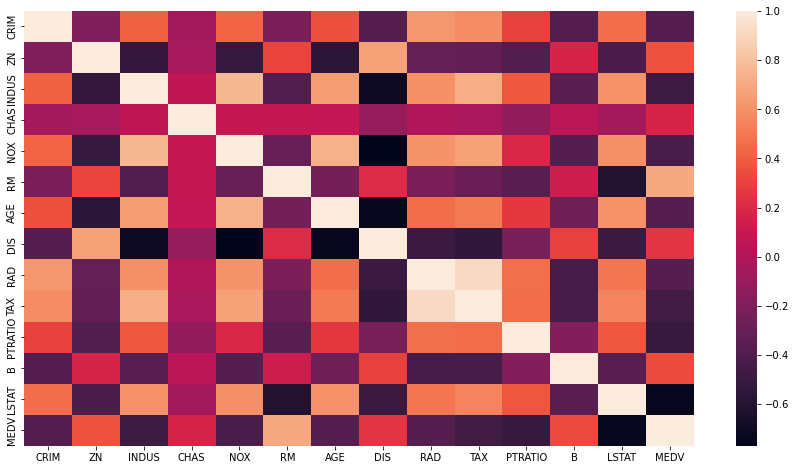

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(corr)
plt.show()

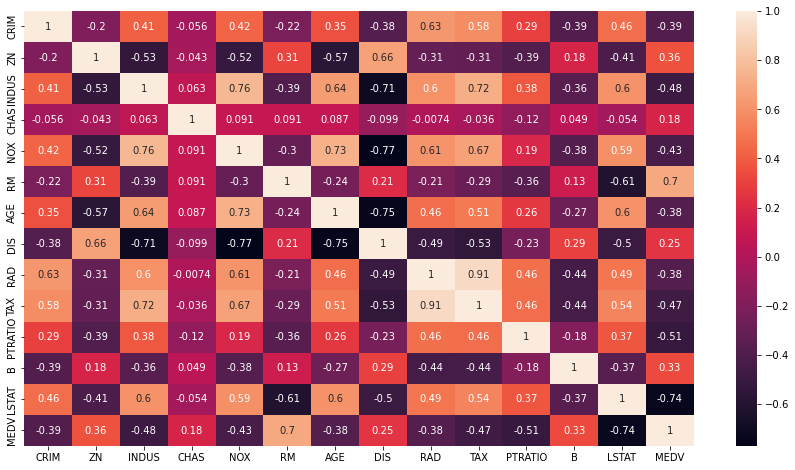

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.show()

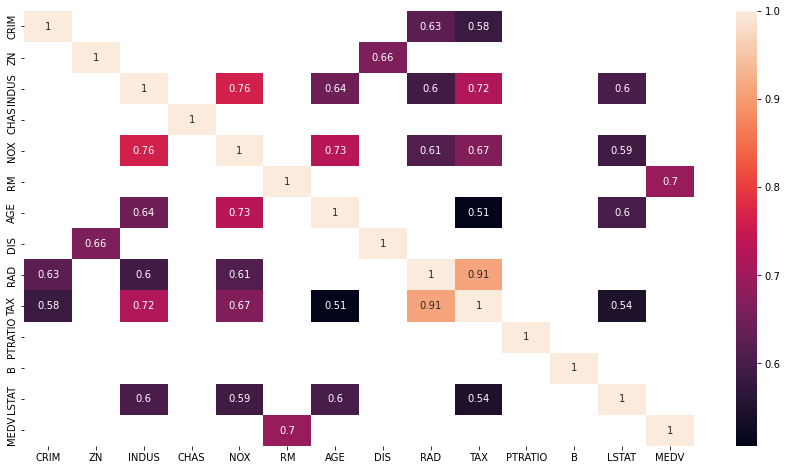

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(corr[corr>0.5], annot=True)
plt.show()

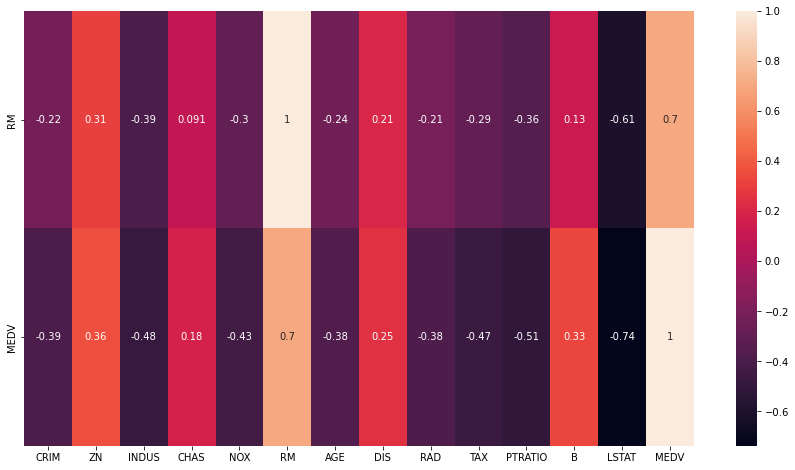

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(corr[corr['MEDV']>0.5], annot=True)
plt.show()

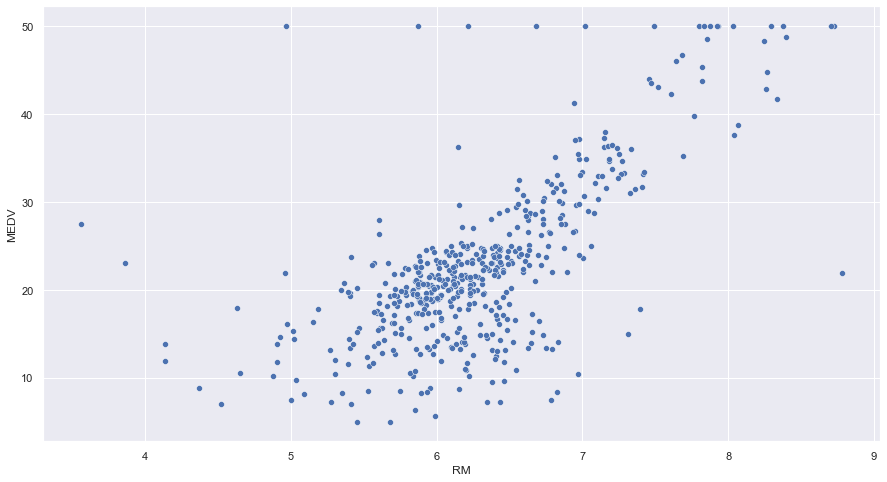

In [21]:
# Visualize the rel(scatter)
plt.figure(figsize=(15,8))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=df, x='RM', y='MEDV')
plt.show()

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

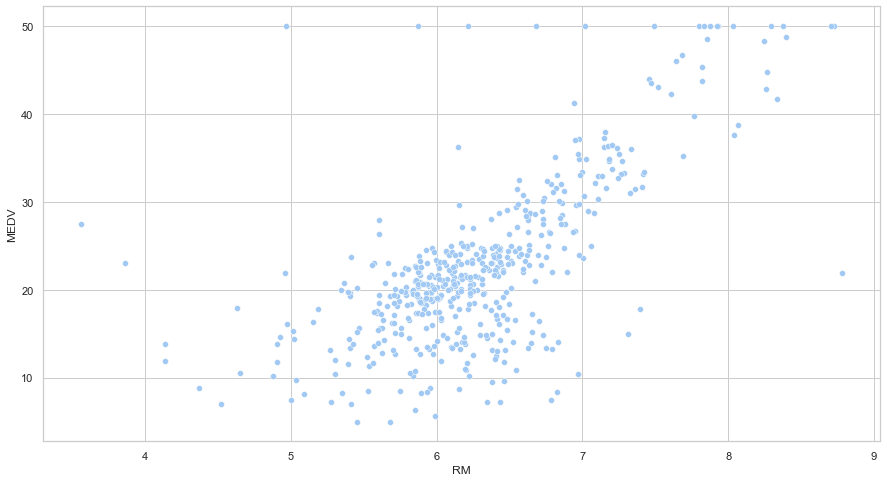

In [22]:
# vis rel(Scatter)
plt.figure(figsize=(15,8))
sns.set_theme(style='whitegrid', palette='pastel')
sns.scatterplot(data=df, x='RM', y='MEDV')

https://seaborn.pydata.org/generated/seaborn.set_theme.html

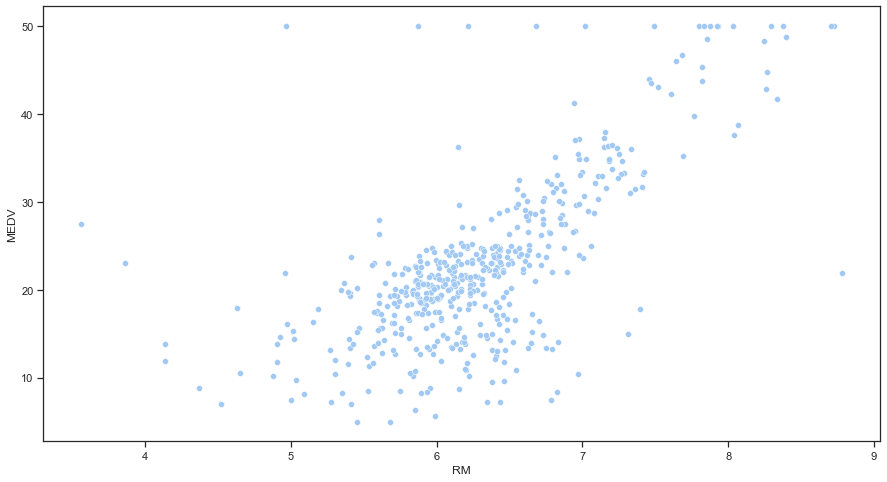

In [23]:
plt.figure(figsize=(15,8))
sns.set_theme(style='ticks', palette=None)
sns.scatterplot(data=df, x='RM', y='MEDV')
plt.show()

### Handing Outliers

- Remove outliers from features first e.g RM
- Boxplot

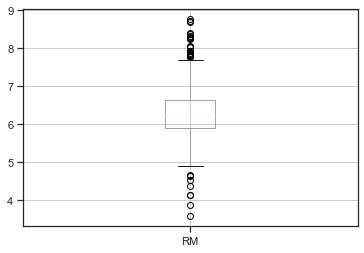

In [24]:
# Find Outliers 
df[['RM']].boxplot()
plt.show()

In [25]:
# Find IQR
qt3 = np.quantile(df.RM, .75)
qt1 = np.quantile(df.RM, .25)

iqr = qt3 - qt1
iqr

0.7379997968673706

In [26]:
# Check the outlier, return boolen, true: outliers
df ['RM'] > qt3 + iqr * 1.5 

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

In [27]:
# Return index & value of outliers- its returned for all features
df[df['RM'] > qt3 + iqr * 1.5] 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.000000,3.4952,2.0,276.0,18.000000,396.899994,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.900002,3.4952,2.0,276.0,18.000000,393.529999,3.57,43.8
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.199997,2.0407,5.0,403.0,14.700000,389.609985,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.900002,2.1620,5.0,403.0,14.700000,388.450012,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.199997,2.0459,5.0,403.0,14.700000,369.299988,3.70,50.0
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.300003,2.7410,3.0,193.0,17.799999,395.559998,7.56,39.8
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.599998,3.1992,3.0,193.0,17.799999,392.630005,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.000000,5.6484,4.0,255.0,14.400000,394.230011,2.97,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.200001,5.1180,4.0,224.0,14.700000,392.779999,3.81,48.5
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.900000,5.1180,4.0,224.0,14.700000,390.549988,2.88,50.0


In [28]:
# Outlier index(upper & lower bound) find for removal:

upper_bound = df[df['RM'] > qt3 + iqr * 1.5 ].index  # Upper: 3rd / 75% or upper bound
lower_bound = df[df['RM'] < qt1 - iqr * 1.5 ].index # lower : below 25% or 1st quartile

# index values
print(upper_bound)
print(lower_bound)

Int64Index([ 97,  98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226,
            232, 233, 253, 257, 262, 267, 280, 283, 364],
           dtype='int64')
Int64Index([365, 367, 374, 384, 386, 406, 412, 414], dtype='int64')


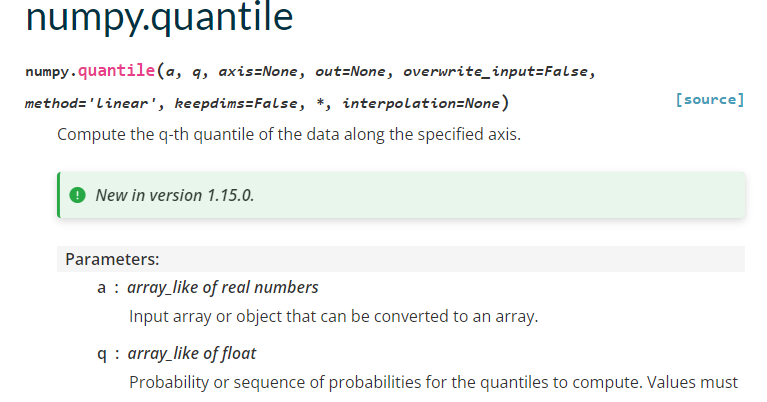

### Update dataFrame with processed data (without outliers)

In [29]:
# create new data
rm_medv = df[['RM', 'MEDV']].copy()
rm_medv            

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [30]:
# Outlier index(upper & lower bound) find for removal: Apply on New data
upper_bound = rm_medv[rm_medv['RM'] > qt3 + (iqr * 1.5)].index
lower_bound = rm_medv[rm_medv['RM'] < qt1 - (iqr * 1.5)].index

#Print Index
print(upper_bound)
print(lower_bound)

Int64Index([ 97,  98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226,
            232, 233, 253, 257, 262, 267, 280, 283, 364],
           dtype='int64')
Int64Index([365, 367, 374, 384, 386, 406, 412, 414], dtype='int64')


### Dropping outliers

<AxesSubplot:>

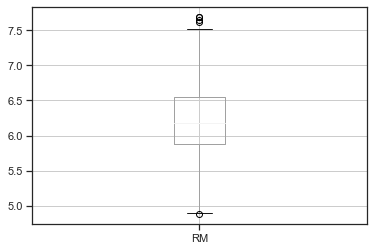

In [31]:
# Drop Outlier & update in new df (rm_medv)
rm_medv.drop(upper_bound, inplace=True)
rm_medv.drop(lower_bound, inplace=True)

# Check & Verify outliers- after treamment
rm_medv[['RM']].boxplot()

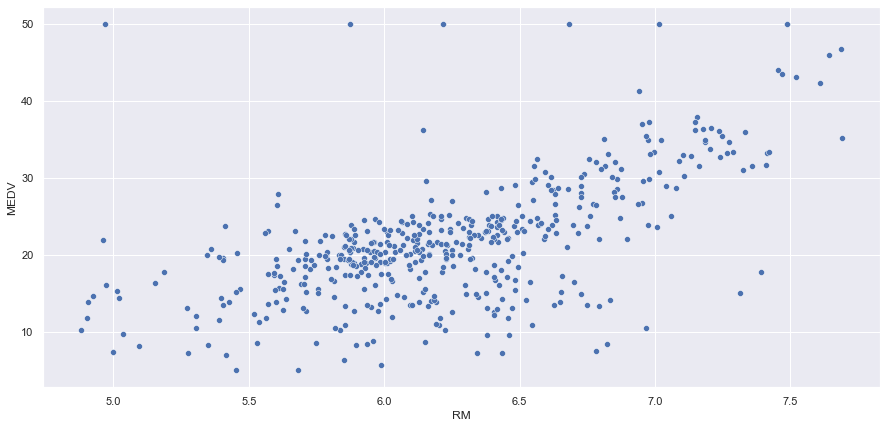

In [32]:
# Re-visualizationa after removing outliers
plt.figure(figsize=(15,7))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=rm_medv, x='RM', y='MEDV')  # data, x & y
plt.show()

#### Feature Engineering & Selection

- Features & Target (x, y) to be selected from procecced data only

In [33]:
x = rm_medv[['RM']]
y = rm_medv['MEDV']

### Train Test Split

#### Split Data from Train & Testing

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state=42)

In [35]:
xtrain  

,RM
454,6.728
249,6.718
265,5.560
353,6.728
134,5.757
...,...
108,6.474
291,7.148
372,5.875
465,5.759


In [36]:
ytrain

454    14.9
249    26.2
265    22.8
353    30.1
134    15.6
       ... 
108    19.8
291    37.3
372    50.0
465    19.9
104    20.1
Name: MEDV, Length: 357, dtype: float64

In [41]:
# Check split size - size of xtrain,ytrain must be same
print(xtrain.shape)
print(ytrain.shape)

(357, 1)
(357,)


In [42]:
print(len(xtrain))
print(len(ytrain))

357
357


In [43]:
print(len(xtest))
print(len(ytest))

119
119


In [45]:
dataset = len(rm_medv)
dataset

476

In [68]:
train_sample = len(xtrain)
test_sample = len(xtest)

In [69]:
# Check & Verify the split ratio
print(f"Train Data : {train_sample/dataset} ")
print(f"Test Data : {test_sample/dataset} ")

Train Data : 0.75 
Test Data : 0.25 


## Modeling

In [56]:
# import libraby
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit/Train the model
model.fit(xtrain, ytrain)

# Linear Equation (y= wx+b)
b = model.intercept_
w = model.coef_

# print b & w
print(f"Intercept b : {b}")
print(f"Coefficint w : {w}")

Intercept b : -32.79572296142578
Coefficint w : [8.7367115]


## Prediction

In [58]:
# Prediction on train data
model.predict(xtrain)

array([25.984875, 25.897503, 15.780392, 25.984875, 17.501526, 21.799988,
       16.365753, 21.389362, 13.936947, 29.71545 , 21.240837, 13.893261,
       21.81746 , 23.905533, 23.381332, 18.506248, 16.846272, 19.05666 ,
       21.083576, 14.050526, 28.343784, 16.278385, 17.36174 , 18.864452,
       23.390072, 25.748981, 25.513088, 10.651943, 20.690426, 17.990784,
       21.127258, 24.10648 , 21.328205, 24.324898, 14.618412, 18.488773,
       21.162209, 31.794785, 20.52443 , 19.065395, 22.944496, 22.394081,
       21.45052 , 29.540714, 23.346386, 24.211319, 14.976616, 10.066586,
       18.558666, 15.85902 , 23.259018, 21.441784, 18.200462, 20.375904,
       25.871296, 31.488998, 10.241318, 27.985577, 20.751583, 21.039894,
       20.568108, 21.083576, 19.676968, 18.532455, 25.17236 , 20.952526,
       22.009666, 18.92561 , 21.625256, 21.45052 , 19.659496, 24.560787,
       19.98275 , 23.058075, 20.603058, 18.497509, 16.068703, 21.057365,
       16.199753, 15.570709, 18.235409, 22.472717, 

In [59]:
model.predict(xtest)

array([17.824783, 17.012272, 18.069412, 20.192432, 21.651463, 18.995502,
       25.548035, 29.916393, 28.081684, 19.659496, 24.34237 , 19.493496,
       23.949219, 19.47602 , 22.263035, 17.117107, 17.117107, 20.821476,
       23.171654, 26.456654, 28.081684, 32.467506, 22.37661 , 23.154175,
       24.648155, 28.501041, 19.703175, 21.46799 , 13.543793, 18.672241,
       21.633991, 29.97755 , 26.168343, 22.883339, 30.536701, 22.752289,
       14.871773, 22.90955 , 13.264217, 22.123245, 24.822887, 23.634697,
       20.882633, 19.860435, 18.52372 , 26.90223 , 16.549221, 23.267754,
       23.075546, 31.218163, 17.07343 , 22.062088, 30.466808, 21.039894,
       22.900814, 27.138119, 21.765038, 19.065395, 14.295151, 27.461376,
       20.94379 , 20.847683, 26.281921, 28.719463, 20.952526, 18.471302,
       23.267754, 22.621239, 21.81746 , 23.43375 , 20.611794, 24.805416,
       11.700348, 18.611088, 21.240837, 18.174252, 20.62053 , 23.162914,
       17.239426, 22.350399, 20.14001 , 22.970707, 

#### Error Calcuation : Prediction - Actual

In [60]:
# Error Calcuation
model.predict(xtrain)- ytrain

454    11.084875
249    -0.302497
265    -7.019608
353    -4.115125
134     1.901526
         ...    
108     3.965747
291    -7.645711
372   -31.467545
465    -2.381003
104     0.983576
Name: MEDV, Length: 357, dtype: float64

- In error, there are some negative, so need to "square" & take "absolute value" to get total errors

In [62]:
# Squaring Errors
(model.predict(xtrain)- ytrain)**2

454    122.874448
249      0.091504
265     49.274901
353     16.934256
134      3.615801
          ...    
108     15.727150
291     58.456893
372    990.206360
465      5.669174
104      0.967422
Name: MEDV, Length: 357, dtype: float64

In [70]:
# Total Error/ Squared Error - Summation
model_total_error = ((model.predict(xtrain) - ytrain)**2).sum() 
model_total_error

13956.023971154766

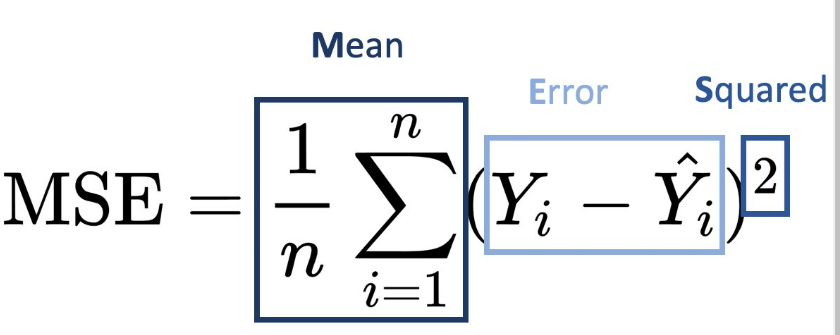

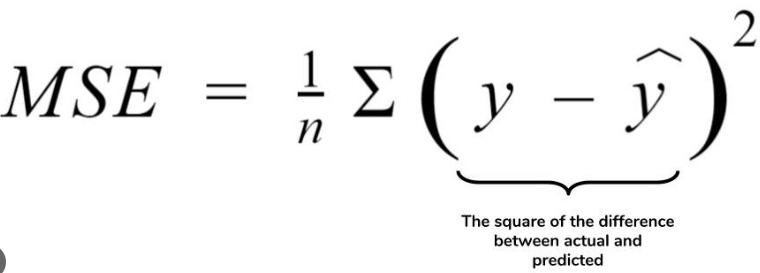

In [71]:
# Means Squared Error Calcuation:
mse = model_total_error / train_sample
mse

39.0925041208817

In [72]:
# Store the prediction values in a variable e.g ypred
ypred = model.predict(xtrain)

## Evaluation & Testing

In [74]:
# import library
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [77]:
# MSE Calucation
mean_squared_error(y_true=ytrain, y_pred=ypred)

39.0925041208817

In [79]:
# MAE Cacluation
mean_absolute_error(y_true=ytrain, y_pred=ypred)

4.192373727750377

In [78]:
# R2 Calcuation, return accuracy rate of model perforamce e.g here model is around 36% accurate 
r2_score(y_true=ytrain, y_pred=ypred)

0.3652214621197136

## Handing Outliers- Alternative Method

In [37]:
# import numpy 
import numpy as np

# Find Q1 & Q3
q1 = np.percentile(df['RM'], 25) # Syntax: fn(dataFrame[Col_Name], Percentile) | it takes 2 param col & percentile
q3 = np.percentile(df['RM'], 75)

# Find IQR
iqr = q3-q1

# Outlier Formula
lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)

# Variable for storing outlier values
outlier = []

# Checking outlier in given column & print values
for x in df['RM']:
    if ((x > upper) or (x<lower)):
        outlier.append(x)
print(outlier)

[8.069000244140625, 7.820000171661377, 7.802000045776367, 8.375, 7.928999900817871, 7.764999866485596, 7.830999851226807, 7.875, 7.853000164031982, 8.034000396728516, 8.265999794006348, 8.725000381469727, 8.039999961853027, 8.336999893188477, 8.246999740600586, 8.258999824523926, 8.704000473022461, 8.39799976348877, 8.29699993133545, 7.820000171661377, 7.922999858856201, 8.779999732971191, 3.561000108718872, 3.86299991607666, 4.138000011444092, 4.368000030517578, 4.6519999504089355, 4.138000011444092, 4.627999782562256, 4.519000053405762]


### Skewness

- Normal distribution will be affected for having outliers in dataset

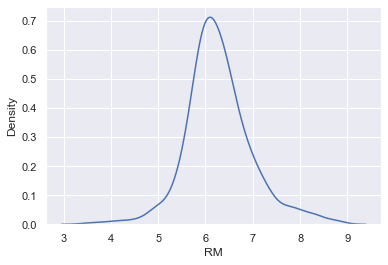

In [38]:
sns.kdeplot(data=df, x='RM')
plt.show()